In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import warnings
warnings.filterwarnings(action='ignore')

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
print(train_images.shape)  # 학습 이미지의 형태와 레이블을 출력한다
print(train_labels)
print(test_images.shape)

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)


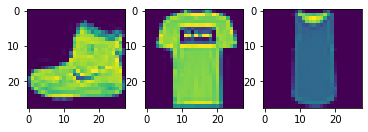

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.imshow(train_images[0])       # 첫 번째 훈련용 데이터
ax2.imshow(train_images[1])       # 두 번째 훈련용 데이터
ax3.imshow(train_images[2])       # 세 번째 훈련용 데이터
plt.show()

In [9]:
# 0-255 구간의 픽셀을 정규화한다
train_images, test_images = train_images / 255, test_images / 255
# 순차 심층 신경망 모델을 만들자
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, batch_size=64,
                    epochs=10, validation_split=0.25)


Epoch 1/10
704/704 [==============================] - 2s 2ms/step - loss: 0.5876 - accuracy: 0.7969 - val_loss: 0.4438 - val_accuracy: 0.8437
Epoch 2/10
704/704 [==============================] - 2s 2ms/step - loss: 0.4344 - accuracy: 0.8452 - val_loss: 0.4077 - val_accuracy: 0.8584
Epoch 3/10
704/704 [==============================] - 2s 3ms/step - loss: 0.3938 - accuracy: 0.8569 - val_loss: 0.3652 - val_accuracy: 0.8681
Epoch 4/10
704/704 [==============================] - 2s 4ms/step - loss: 0.3706 - accuracy: 0.8635 - val_loss: 0.3558 - val_accuracy: 0.8721
Epoch 5/10
704/704 [==============================] - 2s 3ms/step - loss: 0.3560 - accuracy: 0.8682 - val_loss: 0.3447 - val_accuracy: 0.8763
Epoch 6/10
704/704 [==============================] - 2s 3ms/step - loss: 0.3397 - accuracy: 0.8743 - val_loss: 0.3440 - val_accuracy: 0.8744
Epoch 7/10
704/704 [==============================] - 2s 3ms/step - loss: 0.3296 - accuracy: 0.8776 - val_loss: 0.3335 - val_accuracy: 0.8780
Epoch 

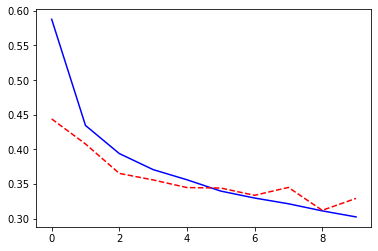

In [11]:
plt.plot(history.history['loss'], 'b-')
plt.plot(history.history['val_loss'], 'r--')


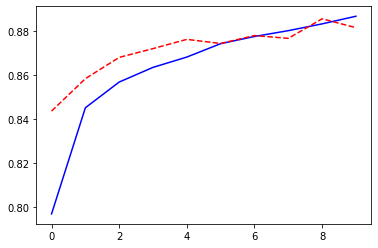

In [12]:
plt.plot(history.history['accuracy'], 'b-')
plt.plot(history.history['val_accuracy'], 'r--')


In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('테스트 정확도:', test_acc)


313/313 - 0s - loss: 0.3505 - accuracy: 0.8715 - 230ms/epoch - 735us/step
테스트 정확도: 0.8715000152587891


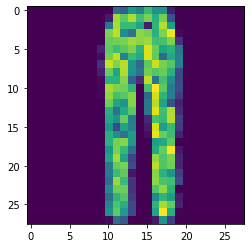

In [16]:
randIdx = np.random.randint(0, 1000)
plt.imshow(test_images[randIdx])


In [17]:
print(test_images[randIdx].shape)
new_image = test_images[randIdx][np.newaxis, :, :]
print(new_image.shape)

yhat = model.predict(new_image)
print(yhat.round(3))    # 소수점 아래 세 자리 정확도로 살펴보자


(28, 28)
(1, 28, 28)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [18]:
yhat = np.argmax(model.predict(test_images[randIdx][np.newaxis, :, :]))
yhat


1

In [19]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [20]:
print(class_names[yhat])


Trouser


In [22]:
def plot_images(images, labels, images_per_row=5):
  n_images = len(images)
  n_rows = (n_images-1) // images_per_row + 1
  fig, ax = plt.subplots(n_rows, images_per_row,
                         figsize=(images_per_row * 2, n_rows * 2))
  for i in range(n_rows):
      for j in range(images_per_row):
          if i*images_per_row + j >= n_images:
            break
          img_idx = i*images_per_row + j
          a_image = images[img_idx].reshape(28, 28)
          if n_rows > 1:
            axis = ax[i, j]
          else:
            axis = ax[j]
          axis.get_xaxis().set_visible(False)
          axis.get_yaxis().set_visible(False)
          label = class_names[labels[img_idx]]
          axis.set_title(label)
          axis.imshow(a_image, interpolation='nearest')


[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 2 8 0 2 5 7 5 1]


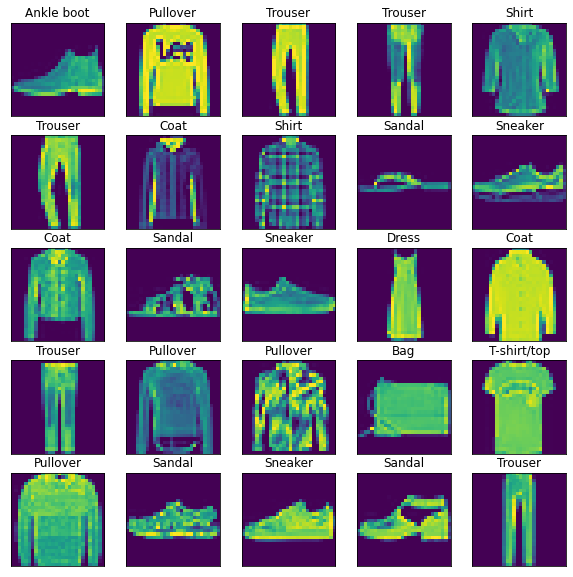

In [23]:
images = test_images[:25]
predictions = np.argmax(model.predict(images), axis=1)
print(predictions)
plot_images(images, predictions, images_per_row=5)
